## Relative Strength Index, 상대강도지수

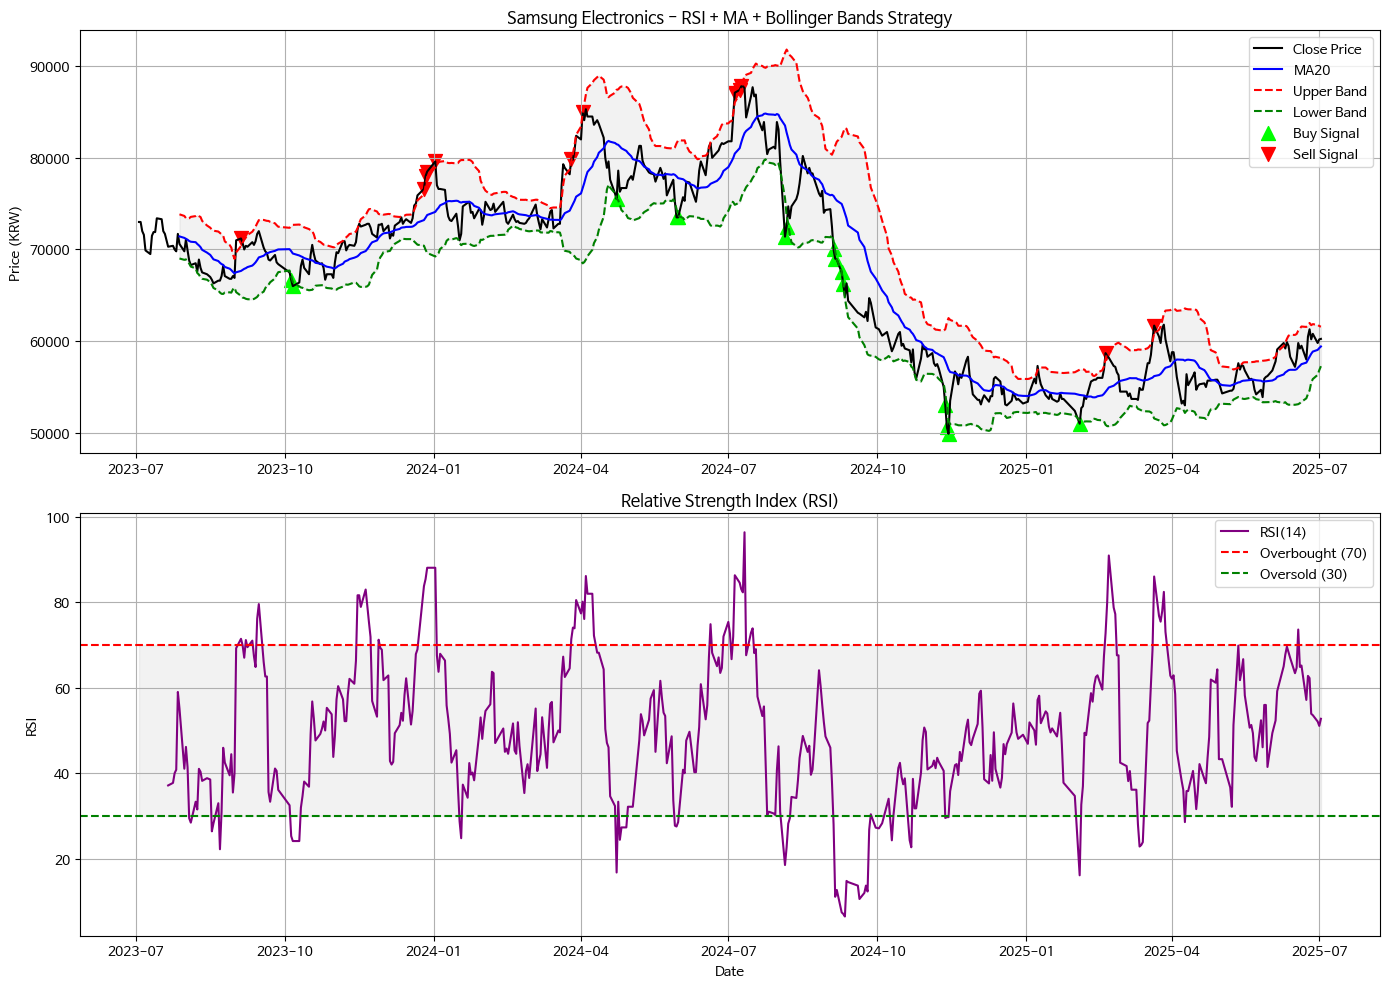

In [4]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 날짜 설정
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. 이동평균 & 볼린저 밴드 계산
window = 20
df['MA20'] = df['종가'].rolling(window).mean()
df['STD20'] = df['종가'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

# 4. RSI 계산 (14일)
delta = df['종가'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 5. 복합 매수/매도 조건 설정
df['Buy'] = (df['RSI'] < 30) & (df['종가'] < df['Lower']) & (df['종가'] < df['MA20'])
df['Sell'] = (df['RSI'] > 70) & (df['종가'] > df['Upper']) & (df['종가'] > df['MA20'])

# 6. 시각화
plt.figure(figsize=(14, 10))

# (1) 종가 + MA + 밴드 + 시그널
plt.subplot(2, 1, 1)
plt.plot(df.index, df['종가'], label='Close Price', color='black')
plt.plot(df.index, df['MA20'], label='MA20', color='blue')
plt.plot(df.index, df['Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df.index, df['Upper'], df['Lower'], color='gray', alpha=0.1)
plt.scatter(df[df['Buy']].index, df[df['Buy']]['종가'], marker='^', color='lime', label='Buy Signal', s=100)
plt.scatter(df[df['Sell']].index, df[df['Sell']]['종가'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Samsung Electronics - RSI + MA + Bollinger Bands Strategy')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) RSI 시각화
plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI(14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.fill_between(df.index, 30, 70, color='gray', alpha=0.1)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## RSI + 매수/매도 시점 마킹

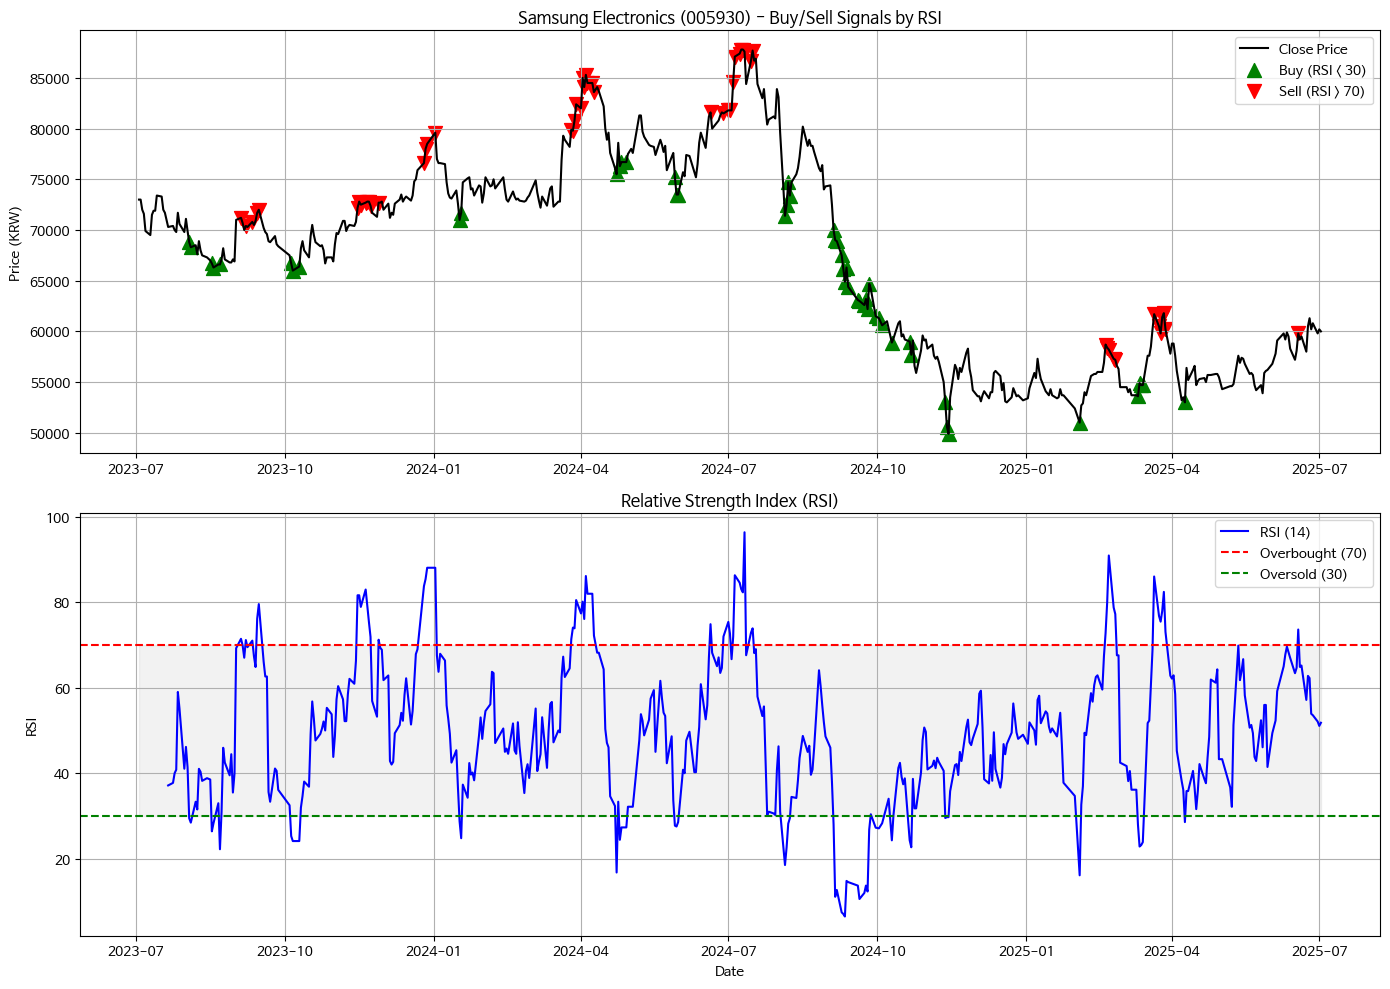

In [5]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 날짜 설정
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자 데이터 불러오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. RSI(14) 계산
window = 14
delta = df['종가'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 4. 매수/매도 시점 조건
df['Buy Signal'] = (df['RSI'] < 30)
df['Sell Signal'] = (df['RSI'] > 70)

# 5. 시각화
plt.figure(figsize=(14, 10))

# (1) 종가 + 매수/매도 시점 표시
plt.subplot(2, 1, 1)
plt.plot(df.index, df['종가'], label='Close Price', color='black')
plt.scatter(df[df['Buy Signal']].index, df[df['Buy Signal']]['종가'], marker='^', color='green', label='Buy (RSI < 30)', s=100)
plt.scatter(df[df['Sell Signal']].index, df[df['Sell Signal']]['종가'], marker='v', color='red', label='Sell (RSI > 70)', s=100)
plt.title('Samsung Electronics (005930) - Buy/Sell Signals by RSI')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) RSI 차트
plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI (14)', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.fill_between(df.index, 30, 70, color='gray', alpha=0.1)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# 조건	시각화	의미
# RSI < 30	▲ 초록색 화살표	과매도 → 매수 타이밍 가능
# RSI > 70	▼ 빨간색 화살표	과매수 → 매도 타이밍 가능

## RSI와 이동평균선, 볼린저 밴드 결합 전략

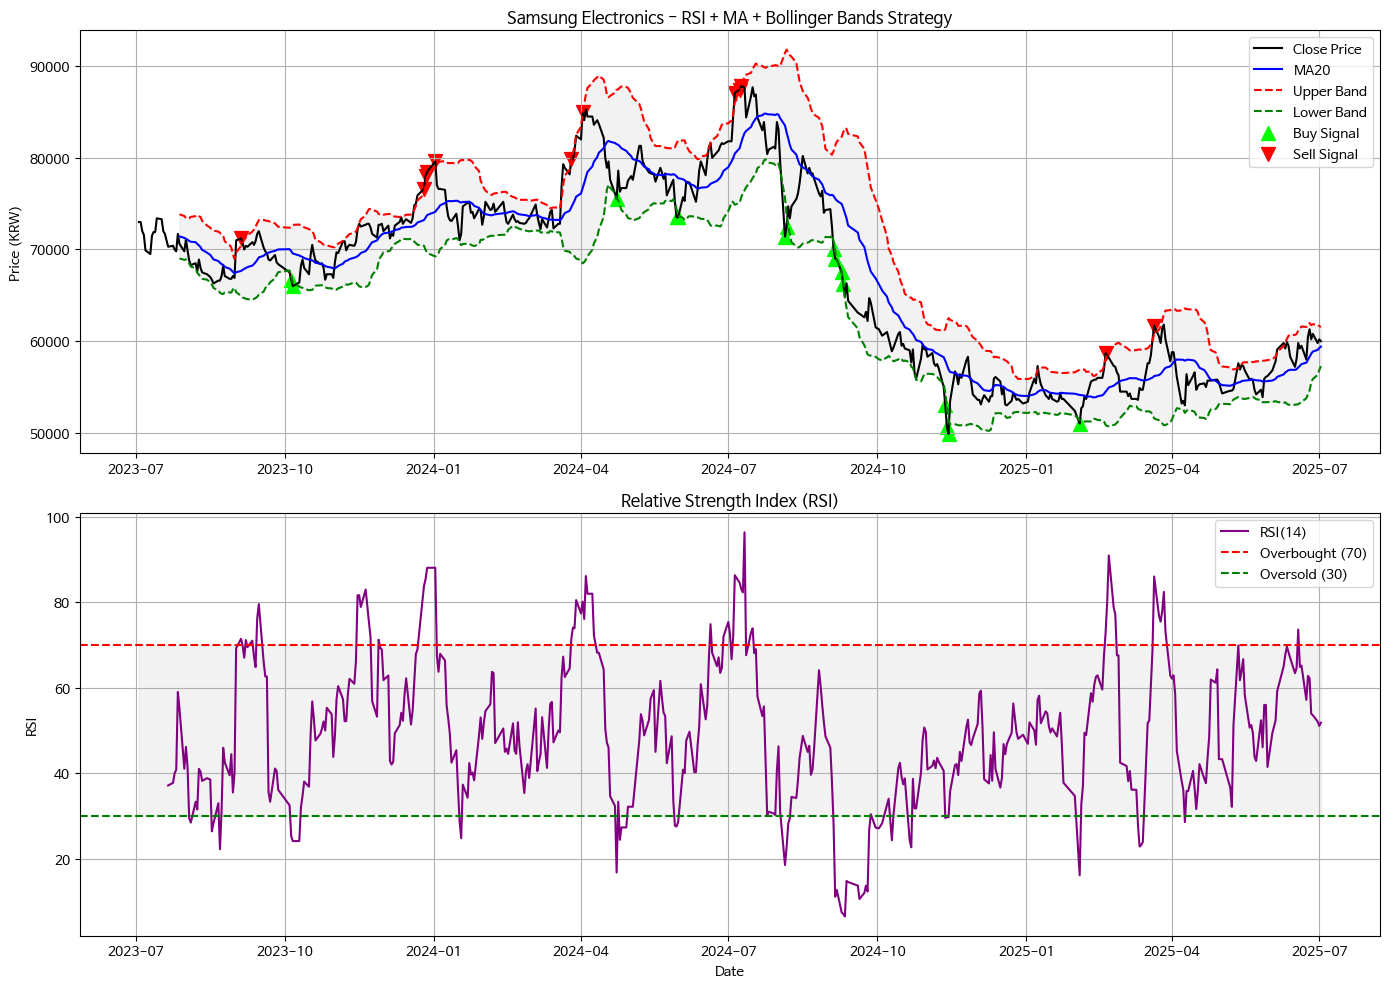

In [6]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 날짜 설정
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. 이동평균 & 볼린저 밴드 계산
window = 20
df['MA20'] = df['종가'].rolling(window).mean()
df['STD20'] = df['종가'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

# 4. RSI 계산 (14일)
delta = df['종가'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 5. 복합 매수/매도 조건 설정
df['Buy'] = (df['RSI'] < 30) & (df['종가'] < df['Lower']) & (df['종가'] < df['MA20'])
df['Sell'] = (df['RSI'] > 70) & (df['종가'] > df['Upper']) & (df['종가'] > df['MA20'])

# 6. 시각화
plt.figure(figsize=(14, 10))

# (1) 종가 + MA + 밴드 + 시그널
plt.subplot(2, 1, 1)
plt.plot(df.index, df['종가'], label='Close Price', color='black')
plt.plot(df.index, df['MA20'], label='MA20', color='blue')
plt.plot(df.index, df['Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df.index, df['Upper'], df['Lower'], color='gray', alpha=0.1)
plt.scatter(df[df['Buy']].index, df[df['Buy']]['종가'], marker='^', color='lime', label='Buy Signal', s=100)
plt.scatter(df[df['Sell']].index, df[df['Sell']]['종가'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Samsung Electronics - RSI + MA + Bollinger Bands Strategy')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) RSI 시각화
plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI(14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.fill_between(df.index, 30, 70, color='gray', alpha=0.1)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 시그널 기반 백테스트

 RSI + 이동평균 + 볼린저 밴드 복합 전략을 기반으로, 시그널 발생 시 매수/매도하며 수익률을 측정하는 백테스트 

총 거래 횟수: 3
평균 수익률: 4.14%
누적 수익률: 8.92%


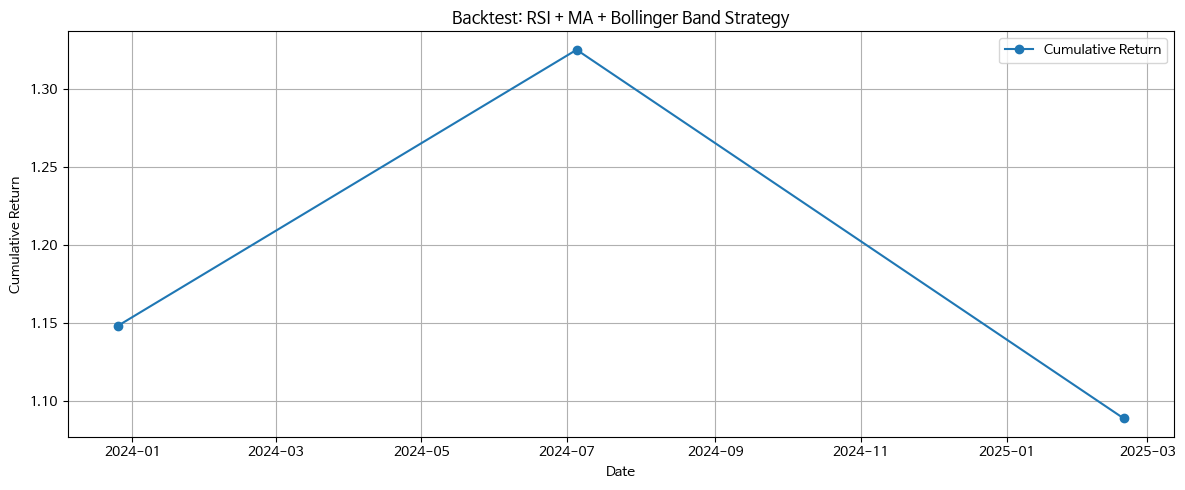

In [7]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 날짜 설정
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자 데이터
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. 기술지표 계산 (RSI + MA20 + Bollinger Band)
window = 20
df['MA20'] = df['종가'].rolling(window).mean()
df['STD20'] = df['종가'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']
delta = df['종가'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 4. 시그널 조건
df['Buy'] = (df['RSI'] < 30) & (df['종가'] < df['Lower']) & (df['종가'] < df['MA20'])
df['Sell'] = (df['RSI'] > 70) & (df['종가'] > df['Upper']) & (df['종가'] > df['MA20'])

# 5. 백테스트 로직: 매수 후 다음 매도까지 보유
trades = []
position = None  # 현재 보유 상태
for date, row in df.iterrows():
    if position is None and row['Buy']:
        # 매수 시점
        position = {'buy_date': date, 'buy_price': row['종가']}
    elif position is not None and row['Sell']:
        # 매도 시점
        position['sell_date'] = date
        position['sell_price'] = row['종가']
        position['return'] = (position['sell_price'] - position['buy_price']) / position['buy_price']
        trades.append(position)
        position = None  # 포지션 종료

# 6. 결과 요약
results = pd.DataFrame(trades)
results['cum_return'] = (1 + results['return']).cumprod()

print("총 거래 횟수:", len(results))
print("평균 수익률: {:.2f}%".format(results['return'].mean() * 100))
print("누적 수익률: {:.2f}%".format((results['cum_return'].iloc[-1] - 1) * 100))

# 7. 시각화
plt.figure(figsize=(12, 5))
plt.plot(results['sell_date'], results['cum_return'], marker='o', label='Cumulative Return')
plt.title('Backtest: RSI + MA + Bollinger Band Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 수수료(예: 0.3%) 반영

In [ ]:
# 매수 수수료: 매수 가격에 0.3% 추가 → buy_price * (1 + fee)

# 매도 수수료: 매도 가격에 0.3% 차감 → sell_price * (1 - fee)

# 최종 수익률 계산: (매도금액 - 매수금액) / 매수금액

총 거래 횟수: 3
평균 수익률 (수수료 반영): 3.52%
누적 수익률 (수수료 반영): 6.98%


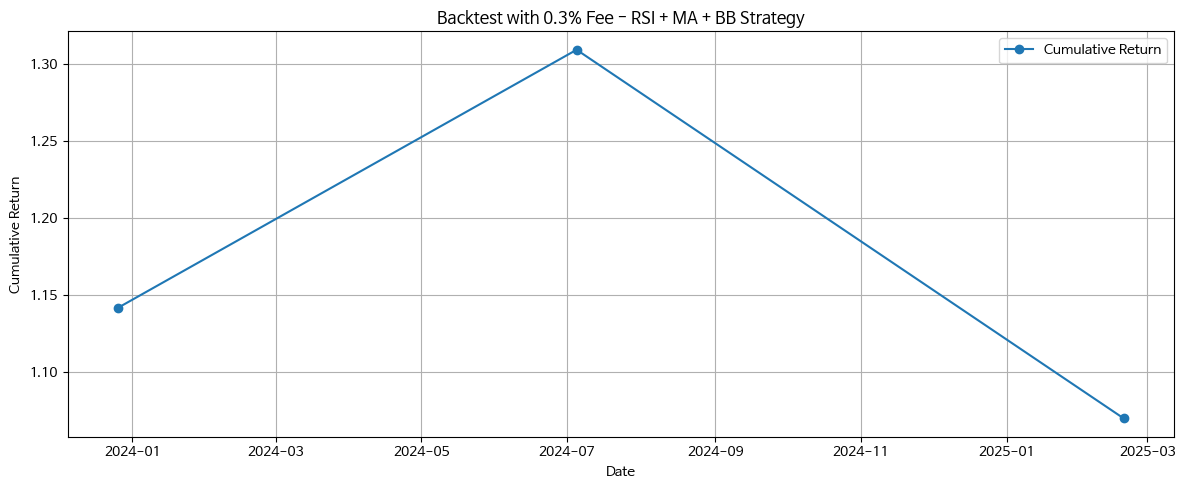

In [8]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 날짜 범위 설정
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자 데이터 불러오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. 기술적 지표 계산 (RSI, MA, 볼린저밴드)
window = 20
df['MA20'] = df['종가'].rolling(window).mean()
df['STD20'] = df['종가'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

delta = df['종가'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 4. 매수/매도 시그널
df['Buy'] = (df['RSI'] < 30) & (df['종가'] < df['Lower']) & (df['종가'] < df['MA20'])
df['Sell'] = (df['RSI'] > 70) & (df['종가'] > df['Upper']) & (df['종가'] > df['MA20'])

# 5. 백테스트 (수수료 반영)
fee = 0.003  # 0.3% 수수료
trades = []
position = None

for date, row in df.iterrows():
    if position is None and row['Buy']:
        # 매수
        position = {
            'buy_date': date,
            'buy_price': row['종가'] * (1 + fee)  # 매수 수수료 적용
        }
    elif position is not None and row['Sell']:
        # 매도
        sell_price = row['종가'] * (1 - fee)  # 매도 수수료 적용
        position['sell_date'] = date
        position['sell_price'] = sell_price
        position['return'] = (sell_price - position['buy_price']) / position['buy_price']
        trades.append(position)
        position = None  # 포지션 종료

# 6. 결과 요약
results = pd.DataFrame(trades)
if not results.empty:
    results['cum_return'] = (1 + results['return']).cumprod()

    print("총 거래 횟수:", len(results))
    print("평균 수익률 (수수료 반영): {:.2f}%".format(results['return'].mean() * 100))
    print("누적 수익률 (수수료 반영): {:.2f}%".format((results['cum_return'].iloc[-1] - 1) * 100))

    # 7. 누적 수익률 시각화
    plt.figure(figsize=(12, 5))
    plt.plot(results['sell_date'], results['cum_return'], marker='o', label='Cumulative Return')
    plt.title('Backtest with 0.3% Fee - RSI + MA + BB Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("해당 조건에 일치하는 거래가 없습니다.")
